In [199]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [200]:
#Parameters


#MACD parameters
n = 9
m = 19
t = 6

#RSI parameters
period = 14

In [201]:
dataimport = pd.read_csv('/Users/hitengoel/Machine Learning/data analysis(technical indiactors)/data-analysis-with-technical-indicators/Pair Trading final/data/Indexes/SP GLOBAL 100.csv')


dataimport['Date'] = pd.to_datetime(dataimport['Date'])
dataimport.set_index('Date', inplace=True)
data = dataimport.resample('W').first()  # Weekly Resampling

data.reset_index(inplace=True)
data['Date'] = data['Date'].astype(str)
stock_names = data.columns[1:]

datacopy = data.copy()

data

,Date,RIO LN Equity,OR FP Equity,AAL LN Equity,CAT UN Equity,JPM UN Equity,CVX UN Equity,KO UN Equity,GE UN Equity,AMT UN Equity,...,MMC UN Equity,MUV2 GY Equity,BP/ LN Equity,DTE GY Equity,MBG GY Equity,NKE UN Equity,7203 JT Equity,PRU LN Equity,DD UN Equity,RO SE Equity
0,2011-01-09,4486.5,85.50,3319.990,94.15,43.58,91.94,32.610,109.6951,51.63,...,27.46,114.85,465.55,9.713,43.408,21.5225,644.0,570.898,49.7697,143.0
1,2011-01-16,4389.0,82.60,3211.497,93.39,43.40,90.41,31.530,111.0753,50.41,...,26.82,111.20,486.35,9.677,45.255,21.0425,691.0,574.316,50.5096,141.7
2,2011-01-23,4384.5,83.25,3274.204,94.01,44.91,92.83,31.565,112.9356,49.85,...,27.71,114.20,500.70,9.549,47.756,21.0175,700.0,589.700,51.1214,147.4
3,2011-01-30,4347.5,85.17,3111.464,94.57,45.02,94.10,31.625,120.2566,51.01,...,27.66,116.25,497.00,9.966,45.767,20.6650,683.0,559.360,49.7840,149.6
4,2011-02-06,4280.0,84.80,3048.259,97.01,44.94,94.93,31.425,120.8567,50.86,...,27.88,114.40,484.85,9.738,44.843,20.6200,680.0,577.735,50.4811,148.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,2022-12-04,5363.0,352.70,3173.500,232.30,134.35,178.36,62.700,66.6957,213.90,...,168.38,295.30,483.55,19.694,61.510,104.9600,2033.0,928.400,69.3500,374.6
622,2022-12-11,5671.0,356.80,3337.000,232.57,131.37,176.56,63.470,66.0637,215.61,...,171.67,303.50,483.50,19.522,64.260,109.6200,1951.0,1085.500,70.4200,378.8
623,2022-12-18,5679.0,349.70,3155.000,233.06,134.21,169.75,63.970,64.9322,215.87,...,173.03,307.20,462.10,19.134,64.050,112.0700,1963.0,1061.000,69.8700,372.4
624,2022-12-25,5609.0,335.05,3113.000,232.29,130.06,169.88,62.840,60.9134,209.62,...,163.73,299.40,466.60,18.946,62.630,103.0500,1910.0,1055.000,67.5600,368.8


In [202]:
data.dtypes

Date               object
RIO LN Equity     float64
OR FP Equity      float64
AAL LN Equity     float64
CAT UN Equity     float64
                   ...   
NKE UN Equity     float64
7203 JT Equity    float64
PRU LN Equity     float64
DD UN Equity      float64
RO SE Equity      float64
Length: 92, dtype: object

## Strat-1 MACD + RSI

In [203]:
def MACD(price_data, short_window, long_window, signal_window, column_name):
    data = price_data
   
    data.loc[:,'EMAn'] = data[column_name].ewm(span=short_window, adjust=False).mean()
    data.loc[:,'EMAm'] = data[column_name].ewm(span=long_window, adjust=False).mean()

    for i in range(short_window):
        data.loc[i,'EMAn'] = None
    for i in range(long_window):
        data.loc[i,'EMAm'] = None
    
    data['MACD'] = data['EMAn'] - data['EMAm']
    data['Signal Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

    trade_sig=np.zeros([len(data),1],dtype=float)

    for i in range(long_window+1,len(data)):
        if data.loc[i,'MACD'] > data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] < data.loc[i-1,'Signal Line']:
            trade_sig[i] = 1
        if data.loc[i,'MACD'] < data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] > data.loc[i-1,'Signal Line']:
            trade_sig[i] = -1
        
    trade_sig=trade_sig.reshape(len(trade_sig),1)

    data_numpy=data['Date'].to_numpy()
    data_numpy=data_numpy.reshape(len(data_numpy),1)
    data_numpy=np.column_stack((data_numpy,data[column_name].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAn'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAm'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['MACD'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['Signal Line'].to_numpy()))

    final=np.column_stack((data_numpy,trade_sig))
    final_df=pd.DataFrame(final,columns=['Date','Close','EMAn','EMAm','MACD','Signal Line','Trade Signal'],index=data.index)

    final_df.drop(["EMAn","EMAm","MACD","Signal Line"],axis=1,inplace=True)
    final_df['Date'] = pd.to_datetime(final_df['Date'])
    final_df['Close'] = final_df['Close'].astype(float) 
    final_df['Trade Signal'] = final_df['Trade Signal'].astype(int)

    return final_df


master_macd = pd.DataFrame()

for name in stock_names:
    temp = MACD(data, n, m, t, name)
    temp = temp[['Date','Trade Signal']]
    temp.columns = ['Date',name]
    temp.set_index('Date', inplace=True)
    master_macd = pd.concat([master_macd, temp], axis=1)

In [204]:
master_macd.insert(0, 'Date', master_macd.index)
master_macd.reset_index(drop=True, inplace=True)
master_macd = master_macd[period:]
master_macd = master_macd.reset_index(drop=True)
#master_macd = master_macd[232:725]
master_macd

,Date,RIO LN Equity,OR FP Equity,AAL LN Equity,CAT UN Equity,JPM UN Equity,CVX UN Equity,KO UN Equity,GE UN Equity,AMT UN Equity,...,MMC UN Equity,MUV2 GY Equity,BP/ LN Equity,DTE GY Equity,MBG GY Equity,NKE UN Equity,7203 JT Equity,PRU LN Equity,DD UN Equity,RO SE Equity
0,2011-04-17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2011-04-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011-05-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011-05-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2011-05-15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,2022-12-04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
608,2022-12-11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
609,2022-12-18,0,0,0,0,0,-1,0,0,0,...,0,0,0,0,0,0,-1,0,0,0
610,2022-12-25,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,0,0,0,0,0,0


In [205]:
def calculate_rsi(prices, period):
    delta = prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.ewm(com=period - 1, min_periods=period).mean()
    avg_loss = loss.ewm(com=period - 1, min_periods=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def generate_signals(rsi_values):
    signals = np.zeros(rsi_values.shape)
    for rsi in rsi_values:
        if rsi < 30:
            signals[rsi_values == rsi] = 1
        elif rsi > 70:
            signals[rsi_values == rsi] = -1
    return signals

rsi_values = pd.DataFrame()
rsi_values['Date'] = data['Date']
for stock in stock_names:
    rsi_values[stock] = calculate_rsi(data[stock], period)

master_rsi = rsi_values[period:]

In [206]:
#master_rsi = master_rsi[232:725]
master_rsi = master_rsi.reset_index(drop=True)
master_rsi

,Date,RIO LN Equity,OR FP Equity,AAL LN Equity,CAT UN Equity,JPM UN Equity,CVX UN Equity,KO UN Equity,GE UN Equity,AMT UN Equity,...,MMC UN Equity,MUV2 GY Equity,BP/ LN Equity,DTE GY Equity,MBG GY Equity,NKE UN Equity,7203 JT Equity,PRU LN Equity,DD UN Equity,RO SE Equity
0,2011-04-17,55.887823,47.627540,53.419416,69.646871,66.318123,79.533438,65.440220,58.809461,45.810277,...,62.707603,50.249724,49.762863,76.270181,47.758461,33.316608,44.134174,74.475201,62.775393,60.966411
1,2011-04-24,43.643090,41.679687,39.253047,56.184320,43.325451,66.171593,64.739783,55.708984,44.255024,...,53.165025,45.827011,39.051968,74.979949,42.297855,35.023858,42.702009,57.325349,55.148033,61.885927
2,2011-05-01,50.790930,54.922266,46.871493,63.465870,47.702098,70.864415,66.580291,54.320981,49.117961,...,57.984879,41.445337,44.064580,73.078054,50.371461,40.592909,45.426507,67.344898,68.150653,66.711624
3,2011-05-08,49.365236,56.342066,45.448382,69.544184,51.256880,71.954913,66.406666,61.153651,50.642847,...,64.868171,43.933719,45.123557,75.848900,53.538391,47.357432,46.252191,71.492249,74.832657,66.824712
4,2011-05-15,42.567956,54.597002,42.021639,63.921470,49.848521,59.128813,59.927266,54.997077,55.161453,...,55.987935,42.683516,41.620457,70.284455,48.547184,49.312577,41.925758,61.827741,64.004895,68.108160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,2022-12-04,55.415767,55.591917,53.974083,63.544440,60.328868,59.552429,55.507794,60.532115,43.755400,...,56.949306,72.468776,60.297100,59.853088,53.575759,49.210919,48.074357,46.911222,61.103497,46.299384
608,2022-12-11,59.984440,57.167509,57.232011,63.632709,57.062637,58.199647,57.245811,59.336382,44.451546,...,59.399620,74.739279,60.282191,58.072041,57.465007,53.010629,41.520164,58.868000,62.240536,48.025743
609,2022-12-18,60.098811,53.619662,52.755448,63.803997,59.322897,53.269434,58.382674,57.159382,44.563896,...,60.402924,75.712587,54.114903,54.157041,57.071807,54.920162,42.750239,56.722439,61.249407,45.619088
610,2022-12-25,58.522630,47.121394,51.749503,63.299459,54.784570,53.350674,54.833950,50.125110,42.346656,...,51.103033,69.622392,55.153898,52.316629,54.363063,47.299249,38.862189,56.182392,57.134239,44.275067


In [207]:
prices = datacopy
prices = prices[period:]
prices = prices.reset_index(drop=True)
prices

,Date,RIO LN Equity,OR FP Equity,AAL LN Equity,CAT UN Equity,JPM UN Equity,CVX UN Equity,KO UN Equity,GE UN Equity,AMT UN Equity,...,MMC UN Equity,MUV2 GY Equity,BP/ LN Equity,DTE GY Equity,MBG GY Equity,NKE UN Equity,7203 JT Equity,PRU LN Equity,DD UN Equity,RO SE Equity
0,2011-04-17,4528.0,83.56,3323.971,109.07,46.86,107.78,33.700,121.0967,50.13,...,29.85,115.15,474.80,11.145,42.518,19.5325,652.0,636.705,53.7251,150.3
1,2011-04-24,4201.5,81.77,2969.129,103.90,43.96,104.50,33.655,119.8966,49.56,...,29.05,112.55,451.65,11.110,40.818,19.6450,645.0,611.493,52.6580,151.0
2,2011-05-01,4402.5,85.68,3147.297,108.85,44.61,107.42,33.870,119.3565,51.05,...,29.61,109.65,460.60,11.060,43.064,20.0275,655.0,642.687,55.9874,155.0
3,2011-05-08,4360.0,86.20,3105.990,114.37,45.18,108.18,33.860,122.8970,51.54,...,30.60,110.90,462.55,11.270,44.080,20.5600,658.0,660.635,58.8188,155.1
4,2011-05-15,4135.5,85.71,3002.971,111.66,44.96,104.09,33.475,120.4366,53.07,...,29.71,110.10,454.50,11.120,42.560,20.7275,639.0,640.123,56.6988,156.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,2022-12-04,5363.0,352.70,3173.500,232.30,134.35,178.36,62.700,66.6957,213.90,...,168.38,295.30,483.55,19.694,61.510,104.9600,2033.0,928.400,69.3500,374.6
608,2022-12-11,5671.0,356.80,3337.000,232.57,131.37,176.56,63.470,66.0637,215.61,...,171.67,303.50,483.50,19.522,64.260,109.6200,1951.0,1085.500,70.4200,378.8
609,2022-12-18,5679.0,349.70,3155.000,233.06,134.21,169.75,63.970,64.9322,215.87,...,173.03,307.20,462.10,19.134,64.050,112.0700,1963.0,1061.000,69.8700,372.4
610,2022-12-25,5609.0,335.05,3113.000,232.29,130.06,169.88,62.840,60.9134,209.62,...,163.73,299.40,466.60,18.946,62.630,103.0500,1910.0,1055.000,67.5600,368.8


In [208]:
def get_returns(master_macd, master_rsi, prices):
    returns = []
    intrade = []
    i = 0
    while(i<len(prices)) :
        buy = 0
        buy_rsi = 100.0
        sell = 0
        sell_rsi = 0.0
        for j in range(1,len(prices.columns)):
            if(master_macd.iloc[i,j]==1):
                if(master_rsi.iloc[i,j]<buy_rsi):
                    buy = j
                    buy_rsi = master_rsi.iloc[i,j]
            elif(master_macd.iloc[i,j]==-1):
                if(master_rsi.iloc[i,j]>sell_rsi):
                    sell = j
                    sell_rsi = master_rsi.iloc[i,j]

        if(len(intrade)==0) :
            returns.append(0)
            
        else :
            b1 = prices.iloc[intrade[0][0],intrade[0][1]]
            s1 = prices.iloc[intrade[0][0],intrade[0][3]]
            b2 = prices.iloc[i,intrade[0][1]]
            s2 = prices.iloc[i,intrade[0][3]]
            r = (((b2-b1))*intrade[0][2]) + ((s1-s2))
            returns.append(r)
            intrade.clear()

        
        if(buy!=0 and sell!=0) :
            buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
            l = [i,buy,buy_quantity,sell]
            intrade.append(l)
        
        i = i+1

    return returns, intrade


In [209]:
returns,intrade = get_returns(master_macd, master_rsi, prices)

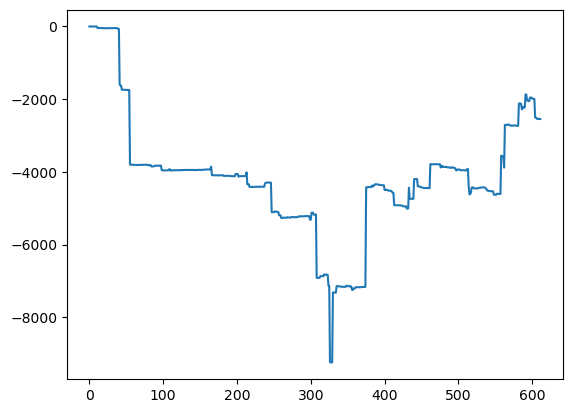

In [210]:
cumulative_returns = np.cumsum(returns)
plt.plot(cumulative_returns)
plt.show()

In [211]:
plt.savefig('/Users/hitengoel/Machine Learning/data analysis(technical indiactors)/data-analysis-with-technical-indicators/Pair Trading final/plots/without clustering/weekly/SP GLOBAL 100_macd_rsi.png', dpi=300)

<Figure size 640x480 with 0 Axes>

## Strat-2 RSI

In [212]:
def get_returns1(master_macd, master_rsi, prices):
    returns = []
    intrade = []
    i = 0
    while(i<len(prices)) :
        buy = 0
        buy_rsi = 100.0
        sell = 0
        sell_rsi = 0.0
        for j in range(1,len(prices.columns)):
            if(master_rsi.iloc[i,j]<30):
                if(master_rsi.iloc[i,j]<buy_rsi):
                    buy = j
                    buy_rsi = master_rsi.iloc[i,j]
            elif(master_rsi.iloc[i,j]>70):
                if(master_rsi.iloc[i,j]>sell_rsi):
                    sell = j
                    sell_rsi = master_rsi.iloc[i,j]

        if(len(intrade)==0) :
            returns.append(0)
            
        else :
            b1 = prices.iloc[intrade[0][0],intrade[0][1]]
            s1 = prices.iloc[intrade[0][0],intrade[0][3]]
            b2 = prices.iloc[i,intrade[0][1]]
            s2 = prices.iloc[i,intrade[0][3]]
            r = (((b2-b1))*intrade[0][2]) + ((s1-s2))
            returns.append(r)
            intrade.clear()

        
        if(buy!=0 and sell!=0) :
            buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
            l = [i,buy,buy_quantity,sell]
            intrade.append(l)
        
        i = i+1

    return returns, intrade

In [213]:
returns1,intrade1 = get_returns1(master_macd, master_rsi, prices)

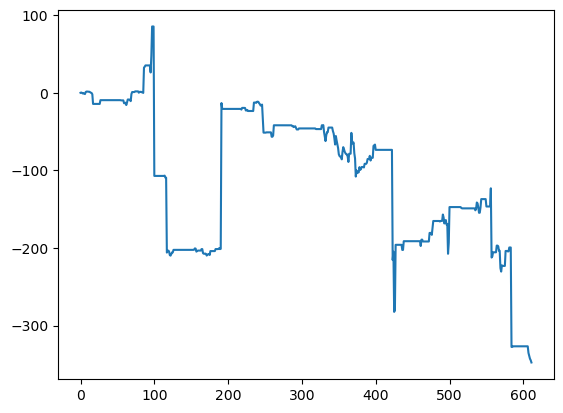

In [214]:
cumulative_returns = np.cumsum(returns1)
plt.plot(cumulative_returns)
plt.show()

In [215]:
plt.savefig('/Users/hitengoel/Machine Learning/data analysis(technical indiactors)/data-analysis-with-technical-indicators/Pair Trading final/plots/without clustering/weekly/SP GLOBAL 100_rsi.png', dpi=300)

<Figure size 640x480 with 0 Axes>